In [17]:
import numpy as np
import utils
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
from autoembedding.combiners import combiner_for_prose, combiner_for_dnabert
#InteractiveShell.ast_node_interactivity = "all"

In [18]:
embeddings_dict = utils.get_embeddings_dict("dataset/NEIS2157.json")

IDs = utils.get_ordered_ids(embeddings_dict)

embeddings_matrix = []
embedder = "prose"

for id in IDs:

    final_embedding = []

    if embedder == "emb_rep":
        final_embedding = np.array(embeddings_dict[id]["embedding1"])  # is a 64-dim array
    
    elif embedder == "dnabert":
        final_embedding = combiner_for_dnabert(
            raw_embedding = np.array(embeddings_dict[id]["embedding2"]), # is a (seq_len % 512)*(768) matrix
            method = "average"
        )

    elif embedder == "prose":
        final_embedding = combiner_for_prose(
            raw_embedding = np.array(embeddings_dict[id]["embedding3"]),  # is a (seq_len)*(100) matrix (each row is the embedding of an amminoacid)
            method = "average"
        ) 
    
    embeddings_matrix.append(final_embedding)

embeddings_matrix = np.array(embeddings_matrix)
embeddings_matrix.shape

(27, 100)

ward


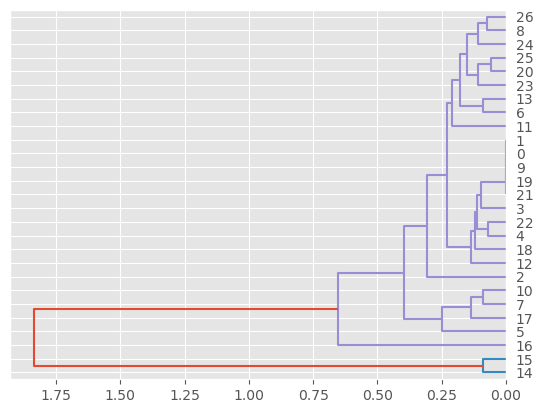

single


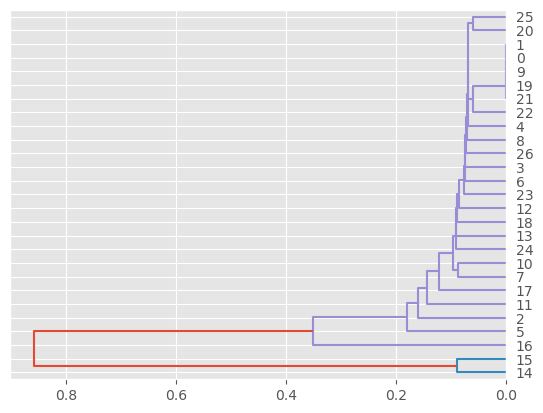

complete


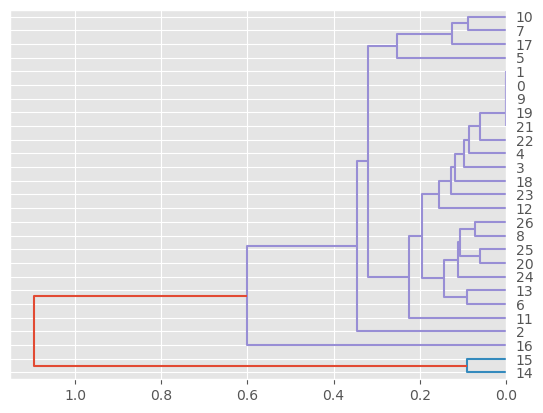

centroid


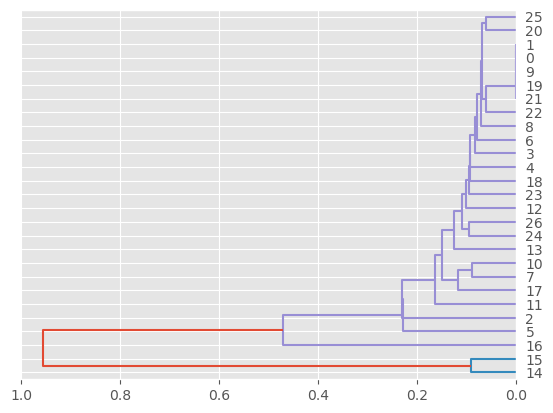

median


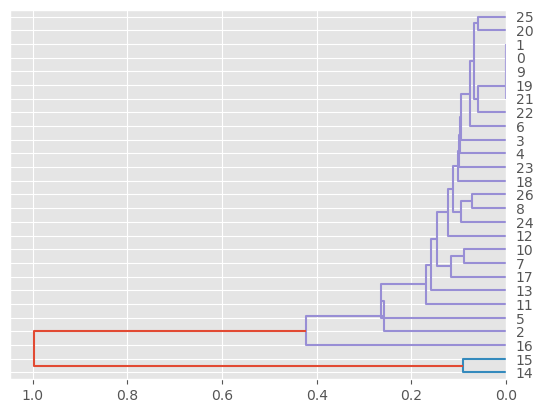

weighted


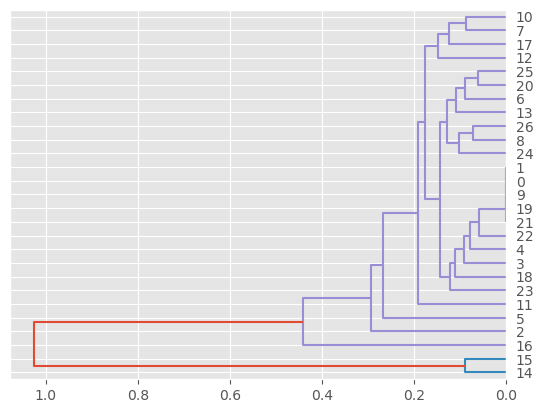

average


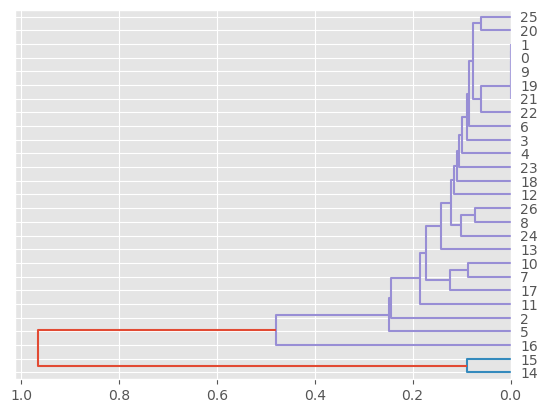

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

methods = ["ward", "single", "complete", "centroid", "median", "weighted", "average"]

condensed_distances = pdist(embeddings_matrix)

for method in methods:
    print(method)
    # Perform hierarchical clustering
    Z = linkage(condensed_distances, method=method)
    # Plot dendrogram
    dendrogram(Z, orientation="left")

    plt.show()

# Get cluster labels
#max_d =30  # set the maximum distance between clusters
#labels = fcluster(Z, max_d, criterion='distance')
#print(labels)

In [20]:
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO

cmd =  ClustalwCommandline("clustalw2", infile="dataset/NEIS2157.fasta", outfile="dataset/NEIS2157_aligned.aln")
#stdout, stderr = cmd()


aln = AlignIO.read("dataset/NEIS2157_aligned.aln", "clustal")



INFO  : Generating linkage from distances (tanglegram.tangle)
INFO  : Generating linkage from distances (tanglegram.tangle)
INFO  : Finished optimising at entanglement 0.00 (tanglegram.tangle)
INFO  : Done. Use matplotlib.pyplot.show() to show plot. (tanglegram.tangle)


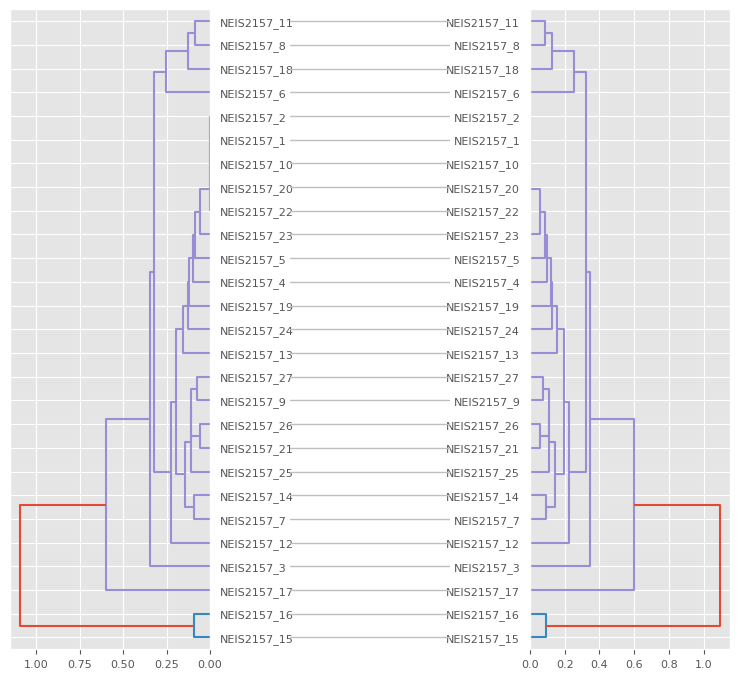

In [26]:
import tanglegram as tg
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import pairwise_distances

# Generate two distance matrices and just switch labels in one
labels = IDs

distances = pairwise_distances(embeddings_matrix, metric="euclidean")



mat1 = pd.DataFrame(distances,
                    columns=labels,
                    index=labels)

mat2 = pd.DataFrame(distances,
                    columns=labels,
                    index=labels)

# Plot tanglegram
fig = tg.plot(
    mat1, 
    mat2, 
    sort=True, 
    link_kwargs = {"method":"complete"}
)

plt.show()